In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List
from tqdm import tqdm

In [2]:
# !pip install implicit

In [3]:
from google.colab import drive


#распаковать данные и провести анализ и обработку

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_users = pd.read_csv('/content/drive/MyDrive/2025Mag2/RecSys/DataSet/users.csv')
df_items = pd.read_csv('/content/drive/MyDrive/2025Mag2/RecSys/DataSet/items.csv')
df_interactions = pd.read_csv('/content/drive/MyDrive/2025Mag2/RecSys/DataSet/interactions.csv')

In [6]:
df_items['release_year'] = df_items['release_year'].fillna(0.0).round().astype(np.int64)
df_items['genres'] = df_items['genres'].fillna("").apply(lambda cell:
                                      ''.join(c for c in cell).split(', '))
df_items['countries'] = df_items['countries'].fillna("").apply(lambda cell:
                                      ''.join(c for c in cell).split(', '))
df_items['for_kids'] = df_items['for_kids'].fillna(0.0).round().astype(np.bool)

In [7]:
df_items.head(5)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002,"[драмы, зарубежные, детективы, мелодрамы]",[Испания],False,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014,"[зарубежные, приключения, комедии]",[США],False,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011,"[криминал, зарубежные, триллеры, боевики, коме...",[Канада],False,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015,"[драмы, зарубежные, мелодрамы]",[Великобритания],False,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978,"[драмы, спорт, советские, мелодрамы]",[СССР],False,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


In [8]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15963 non-null  int64  
 5   genres        15963 non-null  object 
 6   countries     15963 non-null  object 
 7   for_kids      15963 non-null  bool   
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 1.6+ MB


In [9]:
# заменяем  в столбцах age и income на строковое значение
df_users['age'] = df_users['age'].fillna("None")
df_users['income'] = df_users['income'].fillna("None")

In [10]:
# получаем все уникальные значения age и income
uniq_ages = np.sort(df_users['age'].unique())
uniq_income = np.sort(df_users['income'].unique())
print(uniq_ages)
print('__________')
print(uniq_income)


['None' 'age_18_24' 'age_25_34' 'age_35_44' 'age_45_54' 'age_55_64'
 'age_65_inf']
__________
['None' 'income_0_20' 'income_150_inf' 'income_20_40' 'income_40_60'
 'income_60_90' 'income_90_150']


Анализ просмотренных items у юзеров с включенным флажком kids_flg

In [11]:
check_for_kids_users = df_users[df_users['kids_flg'] == True]['user_id'].unique()

In [12]:
check_for_kids_users

array([973171,  15878, 846063, ..., 950528, 191349, 983617])

In [13]:
interactions_for_kids_items = df_interactions[df_interactions['user_id'].isin(check_for_kids_users)]['item_id'].unique()

In [14]:
df_interactions_for_kids_items = df_items[df_items['item_id'].isin(interactions_for_kids_items)].head(50)

In [15]:
df_interactions_for_kids_items

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
1,2508,film,Голые перцы,Search Party,2014,"[зарубежные, приключения, комедии]",[США],False,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011,"[криминал, зарубежные, триллеры, боевики, коме...",[Канада],False,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015,"[драмы, зарубежные, мелодрамы]",[Великобритания],False,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
6,1468,film,Марья-искусница,NaN,1960,"[фильмы, сказки, приключения, советские, семей...",[СССР],False,6.0,NaN,Александр Роу,"Александр Баранов, Александр Хвыля, Анатолий К...",Два прославленных советских сказочника – писат...,"Марья-искусница, 1960, СССР, преодоление, труд..."
7,11114,film,Принцесса Лебедь: Пират или принцесса,"The Swan Princess: Princess Tomorrow, Pirate T...",2016,"[для детей, сказки, полнометражные, зарубежные...",[США],False,6.0,Sony Pictures,Ричард Рич,"Брайан Ниссен, Гарднер Джаэс, Грант Дураззо, Д...",Анимационная сказка о непоседливой принцессе Э...,"Принцесса, Лебедь, Пират, или, принцесса, 2016..."
8,9853,film,Лабиринты прошлого,Todos lo saben,2018,"[криминал, детективы, драмы, зарубежные, трилл...",[Испания],False,16.0,NaN,Асгар Фархади,"Барбара Ленни, Инма Куэста, Карла Кампра, Пене...","Испанка Лаура, давно переехавшая в Буэнос-Айре...","Лабиринты, прошлого, 2018, Испания, семейные, ..."
9,8604,film,Третья попытка,NaN,2013,"[русские, мелодрамы]",[Россия],False,12.0,NaN,Игорь Мужжухин,"Александр Асташенок, Александр Пашков, Андрей ...","Екатерина Рябова, Александр Асташенок и Алекса...","Третья, попытка, 2013, Россия, любовь, измена,..."
10,3526,film,Код «Красный»,Red Joan,2018,"[биография, экранизации, драмы, зарубежные, ме...",[Великобритания],False,18.0,NaN,Тревор Нанн,"Бен Майлз, Джуди Денч, Лоуренс Спэллман, Софи ...",Тихая английская пенсионерка Джоан попадает по...,"Код, Красный, 2018, Великобритания, друзья, лю..."
11,15056,film,Последний шанс,NaN,2018,"[боевики, русские]",[Россия],False,16.0,NaN,Михаил Погосов,"Александр Носик, Алексей Кравченко, Василий Шл...",Несколько лет назад Андрей Борисов оставил слу...,"Последний, шанс, 2018, Россия, бандиты, гангст..."
14,6181,film,"Первая встреча, последняя встреча",NaN,1987,"[драмы, советские, комедии]",[СССР],False,16.0,Ленфильм,Виталий Мельников,"Борис Плотников, Гражина Шаполовска, Иннокенти...","Инициатива наказуема, особенно в Петрограде вр...","Первая, встреча, последняя, встреча, 1987, ССС..."


После анализа списка фильмов, которые были просмотренны  юзерами с флагом for_kids, можно заметить что точно треть фильмов показывать детям не стоит (например Реинкарнация, Бладфест, Шлюхи и невесты, Затащи меня в ад, давай займемся сексом и т.д.)

Поэтому для рекомендаций kids_flg учитываться не будет

In [16]:
df_users.head(5)

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       840197 non-null  object
 2   income    840197 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


In [18]:
# удаляем последнюю строку из interactions
df_interactions['last_watch_dt'] = pd.to_datetime(df_interactions['last_watch_dt'])
print(len(df_interactions))
df_interactions.drop(df_interactions.tail(1).index,inplace=True)
print(len(df_interactions))
df_interactions = df_interactions.assign(reallyWatched = df_interactions['watched_pct'] >= 50.0)

5476251
5476250


In [19]:
uniq_users = df_users['user_id'].unique()
uniq_items = df_items['item_id'].unique()

In [20]:
len(df_interactions)

5476250

In [21]:
# Оставляем только те взаимодействия, Id пользователей и итемов которых есть в таблицах
df_interactions = df_interactions[df_interactions['user_id'].isin(df_users['user_id']) & df_interactions['item_id'].isin(df_items['item_id'])]

In [22]:
len(df_interactions)

4424476

In [23]:
df_interactions.head(5)

,user_id,item_id,last_watch_dt,total_dur,watched_pct,reallyWatched
0,176549,9506,2021-05-11,4250,72.0,True
1,699317,1659,2021-05-29,8317,100.0,True
2,656683,7107,2021-05-09,10,0.0,False
3,864613,7638,2021-07-05,14483,100.0,True
4,964868,9506,2021-04-30,6725,100.0,True


In [24]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4424476 entries, 0 to 5476249
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   last_watch_dt  datetime64[ns]
 3   total_dur      int64         
 4   watched_pct    float64       
 5   reallyWatched  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 206.8 MB


In [25]:
df_interactions.isnull().sum()

,0
user_id,0
item_id,0
last_watch_dt,0
total_dur,0
watched_pct,661
reallyWatched,0


In [26]:
df_items.isnull().sum()

,0
item_id,0
content_type,0
title,0
title_orig,4745
release_year,0
genres,0
countries,0
for_kids,0
age_rating,2
studios,14898


In [27]:
df_users.isnull().sum()

,0
user_id,0
age,0
income,0
sex,13831
kids_flg,0


In [28]:
import matplotlib.pyplot as plt


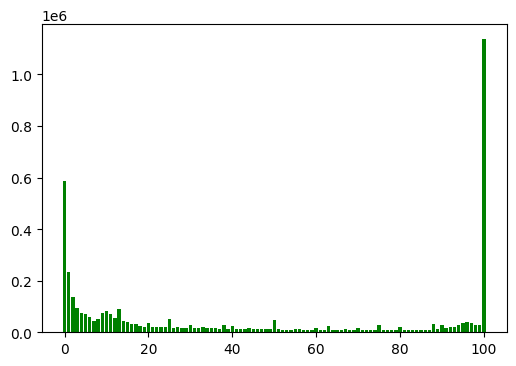

In [29]:
watch = df_interactions['watched_pct'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(watch.index, watch, color='green')
plt.show()
# по графику видно, что многие не досматривают даже до половины

In [30]:
# количество взаимодействий, когда фильм был просмотрен > 85%
print(len(df_interactions[df_interactions['watched_pct']>85.0]))

1486979


In [31]:
#Количество взаимодействий в каждом месяце
monthly = df_interactions.groupby(pd.Grouper(key='last_watch_dt', freq='M')).agg({
    'user_id':'count',
    'total_dur': 'sum'
}).rename(columns={'user_id': 'total_interactions'})
monthly
# ближе к лету просмотров стало больше

/tmp/ipython-input-475604197.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_interactions.groupby(pd.Grouper(key='last_watch_dt', freq='M')).agg({


,total_interactions,total_dur
last_watch_dt,,
2021-03-31,228807,1325997399
2021-04-30,445931,2597646720
2021-05-31,626669,4369379772
2021-06-30,934560,8932255781
2021-07-31,1177157,10105828451
2021-08-31,1011352,6660857785


<Axes: xlabel='last_watch_dt', ylabel='total_interactions'>

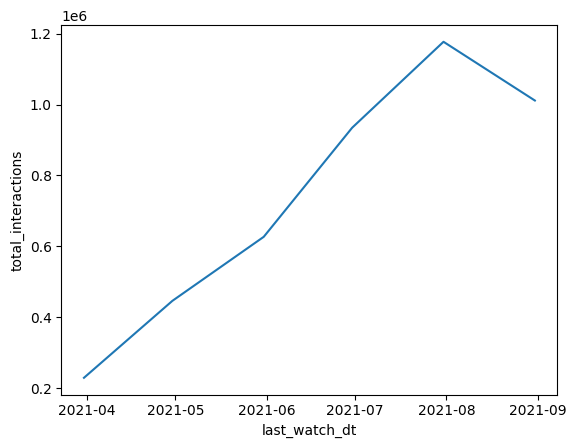

In [32]:
import seaborn as sns
sns.lineplot(data=monthly, x='last_watch_dt', y='total_interactions')

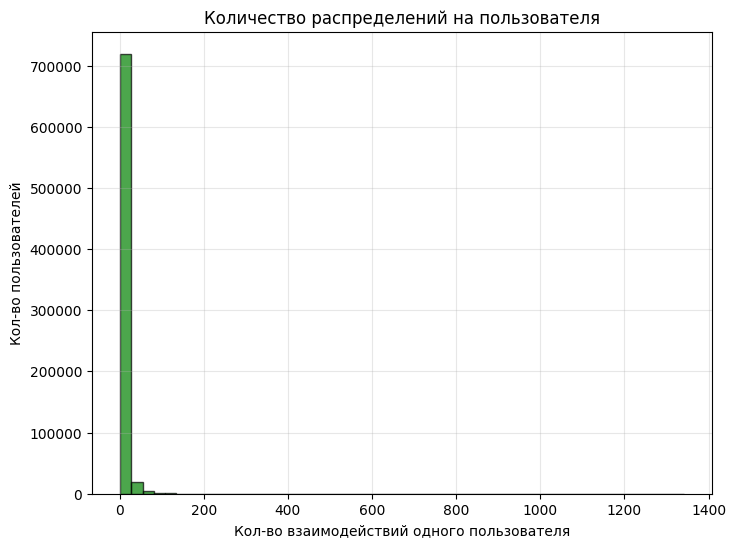

In [33]:
user_activity = df_interactions.groupby('user_id').size().reset_index(name='interac_count')

plt.figure(figsize=(8,6))
plt.hist(user_activity['interac_count'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Количество распределений на пользователя')
plt.xlabel('Кол-во взаимодействий одного пользователя')
plt.ylabel('Кол-во пользователей')
plt.grid(alpha=0.3)
plt.show()

# Большинство пользователей смотрят не более 5-10

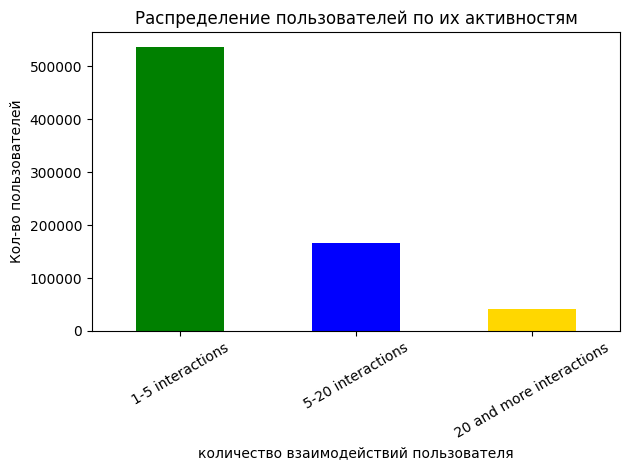

In [34]:
def seg_by_activity(count):
    if 1 <= count <= 5:
        return '1-5 interactions'
    elif 5 < count <= 20:
        return '5-20 interactions'
    elif 20 < count:
        return '20 and more interactions'
    else:
      return "none interactions"

user_activity['activity_seg'] = user_activity['interac_count'].apply(seg_by_activity)

seg_counts = user_activity['activity_seg'].value_counts()

seg_counts.plot(kind='bar', color=['green', 'blue', 'gold', 'red'])
plt.title('Распределение пользователей по их активностям')
plt.xlabel('количество взаимодействий пользователя')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


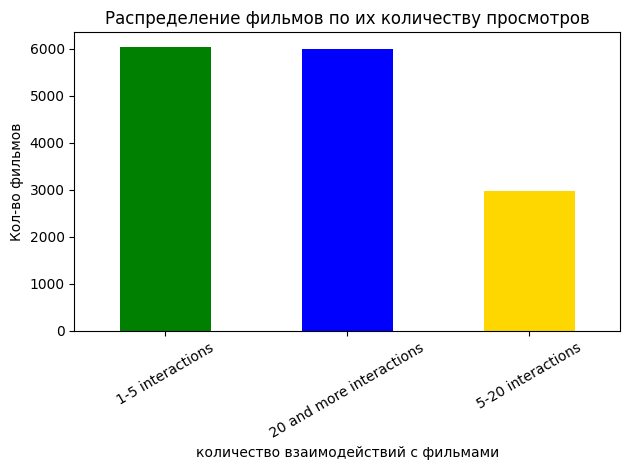

In [35]:
item_activity = df_interactions.groupby('item_id').size().reset_index(name='interac_count')
item_activity['activity_seg'] = item_activity['interac_count'].apply(seg_by_activity)

seg_counts = item_activity['activity_seg'].value_counts()

seg_counts.plot(kind='bar', color=['green', 'blue', 'gold', 'red'])
plt.title('Распределение фильмов по их количеству просмотров')
plt.xlabel('количество взаимодействий с фильмами')
plt.ylabel('Кол-во фильмов')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#Сформировать набор данных

In [36]:
# параметр K
k = 10

test_size_days = 7
dateColumnName = "last_watch_dt"
userColumnName = "user_id"
watchdPrcntColumnName = "watched_pct"
itemIdColumnName = "item_id"
totalDurColumnName = "total_dur"
reallyWatchedColumn = "reallyWatched"

In [37]:
from datetime import datetime, timedelta

# Получение даты с которой начинается тестовый набор
def getLastWeekFirstDay(lastDate, test_size_days=7):
    return lastDate - timedelta(days=(test_size_days-1))

In [38]:
# получение тренировочного и тестового наборов по дням
def splitByLastDate(df_interactions, test_size_days = 7):
  # Получаем последнюю дату
  maxDate = df_interactions[dateColumnName].max()
  lastWeekFirstDate = getLastWeekFirstDay(maxDate, test_size_days)
  print(lastWeekFirstDate)
  data_train = df_interactions[df_interactions[dateColumnName] < lastWeekFirstDate]
  data_test = df_interactions[df_interactions[dateColumnName] >= lastWeekFirstDate]
  return data_train, data_test

In [39]:
df_interactions_train, df_interactions_test = splitByLastDate(df_interactions, test_size_days)

2021-08-16 00:00:00


In [40]:
df_interactions_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335033 entries, 54 to 5476248
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        335033 non-null  int64         
 1   item_id        335033 non-null  int64         
 2   last_watch_dt  335033 non-null  datetime64[ns]
 3   total_dur      335033 non-null  int64         
 4   watched_pct    335032 non-null  float64       
 5   reallyWatched  335033 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 15.7 MB


In [41]:
df_interactions_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4089443 entries, 0 to 5476249
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   last_watch_dt  datetime64[ns]
 3   total_dur      int64         
 4   watched_pct    float64       
 5   reallyWatched  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 191.1 MB


In [42]:
def filter_userInteractions(df):
  # df_Temp = df.copy()
  # df_Temp["grouped"] = df.groupby(userColumnName)[itemIdColumnName].unique().reset_index()
  df_Temp = df.groupby(userColumnName)[itemIdColumnName].unique().reset_index()
  df_Temp.columns = [userColumnName, itemIdColumnName]
  print(len(df_Temp))
  filtered_df_Temp = df_Temp[df_Temp[itemIdColumnName].apply(lambda x: len(x)>3)]
  unique_users = filtered_df_Temp[userColumnName].unique()
  print(len(unique_users))
  return df[df[userColumnName].isin(unique_users)]



In [43]:
df_interactions_train = filter_userInteractions(df_interactions_train)


703552
277310


In [44]:
df_interactions_test = filter_userInteractions(df_interactions_test)

131495
25587


In [45]:
df_interactions_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175703 entries, 64 to 5476201
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        175703 non-null  int64         
 1   item_id        175703 non-null  int64         
 2   last_watch_dt  175703 non-null  datetime64[ns]
 3   total_dur      175703 non-null  int64         
 4   watched_pct    175703 non-null  float64       
 5   reallyWatched  175703 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 8.2 MB


In [46]:
df_interactions_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412999 entries, 0 to 5476249
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   last_watch_dt  datetime64[ns]
 3   total_dur      int64         
 4   watched_pct    float64       
 5   reallyWatched  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 159.5 MB


In [47]:
# достать уникальных пользователей из train
train_unique_users = df_interactions_train[userColumnName].unique()
test_unique_users = df_interactions_test[userColumnName].unique()

test_unique_items = df_interactions_test[itemIdColumnName].unique()
train_unique_items = df_interactions_train[itemIdColumnName].unique()

In [48]:
len(test_unique_users)

25587

In [49]:
# отфильтровать валидные случаи
user_tests_content_interaction = df_interactions_test[((df_interactions_test[reallyWatchedColumn] == True))]

In [50]:
user_tests_content_interaction_Really = df_interactions_test[((df_interactions_test[reallyWatchedColumn] == True))]
user_train_content_interaction_Really = df_interactions_train[((df_interactions_train[reallyWatchedColumn] == True))]

In [51]:
test_unique_items_really = user_tests_content_interaction_Really[itemIdColumnName].unique()
train_unique_items_really = user_train_content_interaction_Really[itemIdColumnName].unique()

In [52]:
user_tests_content_interaction = df_interactions_test.groupby(userColumnName)[itemIdColumnName].unique().reset_index()

In [53]:
user_tests_content_interaction.columns = [userColumnName, itemIdColumnName]

In [54]:
user_tests_content_interaction

,user_id,item_id
0,117,"[12421, 10198, 12192, 16509]"
1,241,"[6162, 2356, 10440, 8986, 12138, 2025]"
2,272,"[15214, 5398, 9728, 15894, 6561, 3190, 13545, ..."
3,322,"[11099, 9265, 633, 12356]"
4,339,"[16413, 15384, 512, 10774]"
...,...,...
25582,1097471,"[10942, 682, 1785, 4927]"
25583,1097473,"[4537, 12133, 4255, 16270, 12908]"
25584,1097479,"[4038, 9563, 7128, 14884]"
25585,1097486,"[8419, 931, 14025, 1916]"


In [55]:
filtered_user_tests_content_interaction = user_tests_content_interaction[user_tests_content_interaction[itemIdColumnName].apply(lambda x: len(x)>1)]


In [56]:
filtered_user_tests_content_interaction

,user_id,item_id
0,117,"[12421, 10198, 12192, 16509]"
1,241,"[6162, 2356, 10440, 8986, 12138, 2025]"
2,272,"[15214, 5398, 9728, 15894, 6561, 3190, 13545, ..."
3,322,"[11099, 9265, 633, 12356]"
4,339,"[16413, 15384, 512, 10774]"
...,...,...
25582,1097471,"[10942, 682, 1785, 4927]"
25583,1097473,"[4537, 12133, 4255, 16270, 12908]"
25584,1097479,"[4038, 9563, 7128, 14884]"
25585,1097486,"[8419, 931, 14025, 1916]"


In [57]:
len(filtered_user_tests_content_interaction)

25587

In [58]:
def precision(recommended_list, bought_list):

    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    flags = np.isin(bought_list, recommended_list)

    precision = flags.sum() / len(recommended_list)

    return precision


def precision_at_k(recommended_list, bought_list, k=5):

    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    #assert len(bought_list) > len(recommended_list)
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]

    flags = np.isin(bought_list, recommended_list)

    precision = flags.sum() / len(recommended_list)


    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5):

    # your_code
    # Лучше считать через скалярное произведение, а не цикл
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]

    flags = np.isin(bought_list, recommended_list)

    precision = np.dot(flags, bought_list) / np.sum(recommended_list)
    return precision

In [59]:
def recall(recommended_list, bought_list):

    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    flags = np.isin(bought_list, recommended_list)

    recall = flags.sum() / len(bought_list)

    return recall


def recall_at_k(recommended_list, bought_list, k=5):

    # your_code
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])

    flags = np.isin(bought_list, recommended_list)

    recall = flags.sum() / len(bought_list)

    return recall


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):

    # your_code
    bought_list = np.array(bought_list)
    recommended_list = recommended_list[:k]

    flags = np.isin(bought_list, recommended_list)

    recall = np.dot(flags, bought_list) / np.sum(bought_list)

    return recall

In [60]:
def ap_k(recommended_list, bought_list, k=5):
    # print("=",bought_list, recommended_list)
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    flags = np.isin(recommended_list, bought_list)
    # if (np.isin([True],flags)[0]):
    #   print(flags)
    if sum(flags) == 0:
        return 0

    sum_ = 0
    for i in range(0, k-1):
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k

    result = sum_ / sum(flags)

    return result

In [61]:
# получение списка взаимодействий юзера
def getUserItems(userInteractionItems, user_id):
  return userInteractionItems[(userInteractionItems[userColumnName] == user_id)][itemIdColumnName].values[0]

In [62]:
# получение значения из матрицы по двум столбцам
def getColFromBy2Col(Items, first_column, second_column, first_c_id):
  return Items[(Items[first_column] == first_c_id)][second_column]

In [63]:
# получение значения из матрицы по двум столбцам
def getValueFromBy2Col(Items, first_column, second_column, first_c_id):
  colFromBy2Col = getColFromBy2Col(Items, first_column, second_column, first_c_id)
  # print(colFromBy2Col)
  if len(colFromBy2Col) > 0:
    return colFromBy2Col.values[0]
  else:
    return None

#random

In [64]:
# def getRandomRecommendOLD(items, k=10):
#   return items[itemIdColumnName].sample(k,replace=True).tolist()

# def getRandomRecommendOLDOLD(items, k=10):
#   return pd.Series(items[itemIdColumnName].unique()).sample(k,replace=True).tolist()

def getRandomRecommend(items, k=10):
  return np.random.choice(items, k)

In [65]:
def getFirstK(items, k=10):
  return items[:k]

In [66]:
# item = рекомендации взять из тестового набора
def map_k(items, userContentInteractions, func, k=10):
    user_ids = userContentInteractions[userColumnName].tolist()
    result = [ap_k(func(items, k), getUserItems(userContentInteractions, i)) for i in user_ids]
    return np.average(result)

#popular

In [67]:
# Получение популярных items по всем
def getPopularItems(df):
  items_content_interaction_Pop = df.groupby(itemIdColumnName)[watchdPrcntColumnName].unique().reset_index()
  items_content_interaction_Pop.columns = [itemIdColumnName, watchdPrcntColumnName]
  items_content_interaction_Pop[watchdPrcntColumnName] = items_content_interaction_Pop[watchdPrcntColumnName].apply(lambda x: len(np.array(x)))
  items_content_interaction_Pop = items_content_interaction_Pop.sort_values(by=watchdPrcntColumnName, ascending=False)
  return items_content_interaction_Pop[itemIdColumnName].unique()

#Popular+UPopular

In [68]:
def sumColVal(x):
  print(x)
  return (len(x[1]))

#ЗАДАЧА 2

In [69]:
all_users = df_interactions[userColumnName].unique()


In [70]:
# получить интеракции пользователя
def get_user_interactions(user_id, df_interactions):
  return df_interactions[((df_interactions[userColumnName] == user_id))]

def getUniqueColumnValues(df, columnName):
  return df[columnName].unique()

In [71]:
import random

#Получение случайного пользователя со списком взаимодействий > k
def getRandomUser(df_interactions, k = 10):
  random_user_interactions = []
  while len(random_user_interactions) < k:
    random_user = random.choice(all_users)
    random_user_interactions = get_user_interactions(random_user, df_interactions)
  return random_user_interactions

In [72]:
# получение строк только по вхождениям из списка
def getitemsByList(df,columnName, list_of_users, list_to_filter = []):
  if len(list_to_filter) == 0:
    return df[df[columnName].isin(list_of_users)]
  else:
    # Создаем булев массив: True для элементов, которые НЕ содержатся в arr2
    mask = ~np.isin(list_of_users, np.array(list_to_filter))
    # убираем из массива элементы для фильтрации
    filtered_list = list_of_users[mask]
    return df[df[columnName].isin(filtered_list)]

In [73]:
releaseYearCol = 'release_year'
genresCol = 'genres'
actorsCol = 'actors'
directorsCol = 'directors'

In [74]:
def getArrayFromDF(df, columnName):
  return df[columnName].apply(lambda x: x.split(', '))

In [75]:
print('')

In [76]:
# Условия для itemXitem

# тот-же год
def sameYearDF(df, year):
  delta = 15
  time_from = year - delta
  time_to = year + delta
  year_condition = (df[releaseYearCol] > time_from) & (df[releaseYearCol] < time_to)

  conditions = [
    (year_condition == True),
    (year_condition != True)
  ]
  choices = [0.20, 0]
  return np.select(conditions, choices)

# Хотя бы один жанр
def sameGenreDF(df, genres):
  conditions = [
    (df[genresCol].str.contains('|'.join(genres)) == True),
    (df[genresCol].str.contains('|'.join(genres)) != True)
  ]
  choices = [0.20, 0]
  return np.select(conditions, choices)

# Хотя бы один актер
def sameActorDF(df, actors):
  conditions = [
    (df[actorsCol].str.contains('|'.join(actors)) == True),
    (df[actorsCol].str.contains('|'.join(actors)) != True)
  ]
  choices = [0.15, 0]
  return np.select(conditions, choices)

# Хотя бы один режиссер
def sameDirectorDF(df, directors):
  conditions = [
    (df[directorsCol].str.contains('|'.join(directors)) == True),
    (df[directorsCol].str.contains('|'.join(directors)) != True)
  ]
  choices = [0.10, 0]
  return np.select(conditions, choices)

# Хотя бы одна страна
def sameCountryDF(df, countries):
  conditions = [
    (df['countries'].str.contains('|'.join(countries)) == True),
    (df['countries'].str.contains('|'.join(countries)) != True)
  ]
  choices = [0.35, 0]
  return np.select(conditions, choices)

##############################################
# Условия для userXitem

# # Сравнить по проценту просмотренного
# def compareWatchedDF(df, watchPrcnt):
#   conditions = [
#     (df[watchdPrcntColumnName] >= watchPrcnt),
#     (df[watchdPrcntColumnName] < watchPrcnt)
#   ]
#   choices = [1, 0]
#   return np.select(conditions, choices)

# Сравнить по проценту просмотренного и по диапазону дат
def sameDateWatchedDF(df, time_from, time_to):
  date_condition = (df[dateColumnName] > time_from) & (df[dateColumnName] < time_to)
  conditions = [
    (date_condition == True),
    (date_condition != True)
  ]
  choices = [1, 0]
  return np.select(conditions, choices)

# Сравнить по полу пользователя
def sameGenderDF(df_u, sex, isActualInfoCondition):
  sex_condition = df_u['sex'] == sex
  conditions = [
    (isActualInfoCondition != True),
    (sex_condition == True),
    (sex_condition != True)
  ]
  choices = [0, 0.45, 0.01]
  return np.select(conditions, choices)

# Сравнить по возрасту пользователя
def sameAgeDF(df_u, age, isActualInfoCondition):
  age_condition = (df_u['age'] != "None") & (df_u['age'] == age)
  conditions = [
    (isActualInfoCondition != True),
    (age_condition == True),
    (age_condition != True)
  ]
  choices = [0, 0.35, 0.01]
  return np.select(conditions, choices)

# Сравнить по заработку пользователя
def sameIncomeDF(df_u, income, isActualInfoCondition):
  income_condition = (df_u['income'] != "None") & (df_u['income'] == income)
  conditions = [
    (isActualInfoCondition != True),
    (income_condition == True),
    (income_condition != True)
  ]
  choices = [0, 0.2, 0.01]
  return np.select(conditions, choices)

In [77]:
def getCoeff(b,itemId, c = 0.25):
  # b.replace(np.nan, False, inplace=True)
  # print(c if b.get(itemId) else 0)
  # print(b.size)
  return c if b.get(itemId) == True else 0

In [78]:
def convertToArray(df, col1, col2, id):
  data = getValueFromBy2Col(df, col1, col2, id)
  return data.split(', ') if type(data) == 'str'else []


In [79]:
# def userKNN(df_interactions_test, df_interactions_train, df_items, df_users, k=10, interrupt = False):


In [98]:
def map_k_KNN_users_test(df_interactions_test, df_interactions_train, df_items, df_users, k=10, interrupt = False):
  mapK = 0

  # получаем всех юзеров из тестового и тренировочного набора
  all_test_users = getUniqueColumnValues(df_interactions_test, userColumnName)
  all_train_users = getUniqueColumnValues(df_interactions_train, userColumnName)
  # all_test_users = [all_test_users[1814]]
  # Получаем списко самых популярных впринципе из Train
  list_all_popular = getPopularItems(df_interactions_train)

  # Все
  # user_tests_content_interaction = df_interactions_test.groupby(userColumnName)[itemIdColumnName].unique().reset_index()
  # user_tests_content_interaction.columns = [userColumnName, itemIdColumnName]

  sum_ap_k = 0 # сумма значений метрики ap k
  userRecomendations = 0 # просмотренные пользователи с рекомендациями
  counter = 0
  len_test = len(all_test_users)
  # для каждого пользователя находим рекоммендации
  for user_id in all_test_users:

    counter += 1
    all_test_items = getColFromBy2Col(df_interactions_test, userColumnName, itemIdColumnName, user_id).unique()

    # если в тесте меньше 5 взаимодействий, значит и рекомендовать ему нечего
    if len(all_test_items) > 4:
      # получаем все items из train у юзера
      all_train_items = getColFromBy2Col(df_interactions_train, userColumnName, itemIdColumnName, user_id).unique()
      # Если нету такого пользователя в Train или мало , то рекомендуем ему популярные ('Холодный старт')
      is_all_train_items = len(all_train_items) > 0
      recomendations = []
      if (is_all_train_items):
        user_interactions_train = get_user_interactions(user_id, df_interactions_train)
        user_Item_Train_df = pd.DataFrame()

        # Находим индекс юзера которого рассматриваем
        index_to_delete = np.where(all_train_users == user_id)[0]
        # Удаляем этого юзера
        all_train_users_without_choosen = np.delete(all_train_users, index_to_delete)

        users_serie = pd.Series(all_train_users_without_choosen)
        user_Item_Train_df = pd.concat([user_Item_Train_df, users_serie.rename(userColumnName)], axis=1)
        # print(len(users_serie), len(all_train_users_without_choosen), len(all_train_users))

        df_filtered_users = df_users[df_users['user_id'].isin(all_train_users_without_choosen)]
        # Заполняем матрицу user+item
        # 3 недели
        time_delta_days = np.timedelta64(30, 'D')
        user_sex = getValueFromBy2Col(df_filtered_users, userColumnName, 'sex', user_id)
        user_age = getValueFromBy2Col(df_filtered_users, userColumnName, 'age', user_id)
        user_income = getValueFromBy2Col(df_filtered_users, userColumnName, 'income', user_id)
        print(len(all_train_items))
        for itemId in all_train_items:
          time_from = getValueFromBy2Col(user_interactions_train, itemIdColumnName, dateColumnName, itemId) - time_delta_days
          time_to = getValueFromBy2Col(user_interactions_train, itemIdColumnName, dateColumnName, itemId) + time_delta_days

          actual_interactions = df_interactions_train[(df_interactions_train[dateColumnName] > time_from) & (df_interactions_train[dateColumnName] < time_to)]
          uniq_actual_users = actual_interactions[userColumnName].unique()

          isActualInfoCondition = df_filtered_users[userColumnName].isin(uniq_actual_users)

          isSameGenderDF = sameGenderDF(df_filtered_users, user_sex, isActualInfoCondition)
          isSameAgeDF = sameAgeDF(df_filtered_users, user_age, isActualInfoCondition)
          isSameIncomeDF = sameIncomeDF(df_filtered_users, user_income, isActualInfoCondition)
          values_uI = pd.Series(isSameGenderDF + isSameAgeDF + isSameIncomeDF)
          user_Item_Train_df = pd.concat([user_Item_Train_df, values_uI.rename(itemId)], axis=1)


        cols_items = all_train_items
        # берем тех юзеров, у которых совпадение хотя бы по одному фильму
        temp_df_user_item = user_Item_Train_df[user_Item_Train_df[cols_items].sum(axis=1) >= 0.8]
        # подсчитаем сумму все х совпадений по экземплярам и отсортируем
        if len(cols_items) > 1:
          temp_df_user_item.insert(1, 'sumCount', temp_df_user_item[cols_items].sum(axis=1))
        else:
          temp_df_user_item["sumCount"] = temp_df_user_item[cols_items[0]]
        temp_df_user_item.sort_values(by='sumCount', ascending=False)

        unique_users_List_Train = temp_df_user_item[userColumnName].unique()
        unique_user_Interactions_Train = getitemsByList(df_interactions_train, userColumnName, unique_users_List_Train)
        unique_user_Interactions_Train = unique_user_Interactions_Train.drop_duplicates(subset=[itemIdColumnName], keep=False)  # С использованием keep=False дубликаты не сохраняются!
        unique_u_i_T = unique_user_Interactions_Train[itemIdColumnName].unique()
        selected_items_train_df = getitemsByList(df_items, itemIdColumnName, unique_u_i_T, cols_items)
        # print(len(selected_items_train_df[itemIdColumnName].unique()), len(unique_u_i_T))
        unique_user_Interactions_Train_df = pd.DataFrame(selected_items_train_df[itemIdColumnName])

        # получаем матрицу item+item
        for itemId in cols_items:
          release_year = getValueFromBy2Col(df_items, itemIdColumnName, releaseYearCol, itemId)
          genres = convertToArray(df_items, itemIdColumnName, genresCol, itemId)
          actors = convertToArray(df_items, itemIdColumnName, actorsCol, itemId)
          directors = convertToArray(df_items, itemIdColumnName, directorsCol, itemId)
          countries = convertToArray(df_items, itemIdColumnName, 'countries', itemId)

          isSameGenre = sameGenreDF(selected_items_train_df, genres)
          isSameYear = sameYearDF(selected_items_train_df, release_year)
          isSameActor = sameActorDF(selected_items_train_df, actors)
          isSameDirector = sameDirectorDF(selected_items_train_df, directors)
          isSameCountry = sameCountryDF(selected_items_train_df, countries)

          values = pd.Series(isSameGenre + isSameYear + isSameActor + isSameDirector + isSameCountry)

          unique_user_Interactions_Train_df = pd.concat([unique_user_Interactions_Train_df, values.rename(itemId)], axis=1)

        # берем тех items, у которых совпадение в сумме дает 1
        temp_df_item_item = unique_user_Interactions_Train_df[unique_user_Interactions_Train_df[cols_items].sum(axis=1) >= 1]
        # сортируем
        if len(cols_items) > 1:
          temp_df_item_item.insert(1, 'sumCount', temp_df_item_item[cols_items].sum(axis=1))
        else:
          temp_df_item_item["sumCount"] = temp_df_item_item[cols_items[0]]

        temp_df_item_item.sort_values(by='sumCount', ascending=False)
        # print(temp_df_item_item)
        # топ k
        recomendations = temp_df_item_item.head(k)[itemIdColumnName].unique()
        # если все рекомендации то считаем ap_k
        if len(recomendations) == k:
          sum_ap_k += ap_k(recomendations, all_test_items)
          # print(recomendations)
          list_recommend = recomendations
          print('----------------------------')

          print('для пользователя ', user_id, " - предсказания по алгоритму:")
          recommendNames = df_items[df_items['item_id'].isin(list_recommend)]['title_orig'].unique()
          for ind,name in enumerate(recommendNames):
            print(ind,': ', name)

          print('для пользователя ', user_id, " - тестовые данные:")
          testNames = df_items[df_items['item_id'].isin(all_test_items)]['title_orig'].unique()
          for ind,name in enumerate(testNames):
            if ind > 19:
              break
            print(ind,': ', name)

          print('----------------------------')

      # Если нету такого пользователя в Train, то рекомендуем ему популярные ('Холодный старт')
      # Или если в рекомедациях не набралось k экземпляров, дополняем их популярными
      if (is_all_train_items == False or len(recomendations)<k):
        dif_k = k - len(recomendations)
        list_recommend = []
        # дополняем список рекомендуемых экземплярами из популярного
        if dif_k>0:
          list_recommend = np.concatenate([recomendations, getFirstK(list_all_popular, dif_k)])
        else:
          list_recommend = recomendations
        sum_ap_k += ap_k(list_recommend, all_test_items)

      # + счетчик рекомендаций
      userRecomendations += 1
    # if (counter % 50 == 0):
    # для
    if (sum_ap_k/userRecomendations > mapK):
      print('----------------------------')

      print('для пользователя ', user_id, " - предсказания:")
      recommendNames = df_items[df_items['item_id'].isin(list_recommend)]['title_orig'].unique()
      for ind,name in enumerate(recommendNames):
        print(ind,': ', name)

      print('для пользователя ', user_id, " - тестовые данные:")
      testNames = df_items[df_items['item_id'].isin(all_test_items)]['title_orig'].unique()
      for ind,name in enumerate(testNames):
        if ind > 19:
          break
        print(ind,': ', name)

      print('----------------------------')
    mapK = sum_ap_k/userRecomendations
    print('_____________________', counter, ' / [',userRecomendations,' ]/ [mapK = ',sum_ap_k/userRecomendations,']', len_test)
    if interrupt == True and userRecomendations == 100:
      break

  return sum_ap_k/userRecomendations



In [83]:
unique_users_test = df_interactions_test[userColumnName].unique()
unique_users_train = df_interactions_train[userColumnName].unique()

In [84]:
# оставляем только тех пользователей, которые есть в interactions
df_filtered_users = df_users[df_users[userColumnName].isin(np.concatenate((unique_users_test, unique_users_train)))]

In [85]:
print(len(df_users), len(df_filtered_users))

840197 287078


In [86]:
len(df_items)

15963

In [99]:
mapk_KNN = map_k_KNN_users_test(df_interactions_test, df_interactions_train, df_items, df_filtered_users, k)

54
----------------------------
для пользователя  73446  - предсказания по алгоритму:
0 :  nan
1 :  Dnipro Wind. Charms of Canes
2 :  Ransom
3 :  Death Caravan
4 :  Goldfish Year
5 :  One Chance in a Thousand
6 :  Fear
для пользователя  73446  - тестовые данные:
0 :  Aladdin (2019)
1 :  Wrath of Man
2 :  Adieu les cons
3 :  Finding Dory
4 :  The Swordsman
5 :  Universitet monstrov
6 :  Monsters University
----------------------------
_____________________ 1  / [ 1  ]/ [mapK =  0.0 ] 25587
_____________________ 2  / [ 2  ]/ [mapK =  0.0 ] 25587
_____________________ 3  / [ 3  ]/ [mapK =  0.0 ] 25587
_____________________ 4  / [ 3  ]/ [mapK =  0.0 ] 25587
59
----------------------------
для пользователя  626036  - предсказания по алгоритму:
0 :  Hable con ella
1 :  nan
2 :  Blood Child
3 :  Dnipro Wind. Charms of Canes
4 :  Cendrillon au Far West
5 :  Ladies' Man 2
6 :  Death Caravan
для пользователя  626036  - тестовые данные:
0 :  Trumbo
1 :  The Man Who Knew Infinity
2 :  Les
3 :  Woo

KeyboardInterrupt: 

 Для объединенной метрики UserKNN + ItemKNN
 На 1627 людях mapK = 1.2%

Для объединенной метрики UserKNN + ItemKNN На 8529 людях mapK = 1.21%

In [ ]:
mapk_KNN

In [ ]:
1814

1814